<a href="https://colab.research.google.com/github/Wildan-Alrasyid/EVDA/blob/main/Wildan_Alrasyid_Project_Akhir_EVDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center><h2><strong><font color="blue">FINAL PROJECT</font></strong></h2></center>
<center><h2><strong><font color="blue">Sentiment Analysis</font></strong></h2></center>
<center><h3><strong><font color="blue">Explorasi dan Visualisasi Data Analysis</a></font></strong></h3></center>

<img alt="" src="https://seeklogo.com/vector-logo/232715/universitas-indonesia"/>

<center><h3><strong><font color="blue">Wildan Alrasyid (2006614784)</a></font></strong></h3></center>
<center><h3><strong><font color="blue">S2 Matematika Fakultas MIPA</font></strong></h3></center>
<center><h3><strong><font color="blue">Universitas Indonesia </a></font></strong></h3></center>
<b><center><h3><strong><font color="blue">2022</h3></center>

In [1]:
import warnings; warnings.simplefilter('ignore')
import nltk

try:
    import google.colab
    IN_COLAB = True
    !wget https://raw.githubusercontent.com/taudata-indonesia/eLearning/master/taudataDDGsna.py
    !mkdir data
    !wget -P data/ https://raw.githubusercontent.com/taudata-indonesia/eLearning/master/data/contoh.pdf
    !wget -P data/ https://raw.githubusercontent.com/taudata-indonesia/eLearning/master/data/slang.txt
    !wget -P data/ https://raw.githubusercontent.com/taudata-indonesia/eLearning/master/data/stopwords_id.txt
    !wget -P data/ https://raw.githubusercontent.com/taudata-indonesia/eLearning/master/data/stopwords_en.txt
    !wget -P data/ https://raw.githubusercontent.com/taudata-indonesia/eLearning/master/data/kata_dasar.txt
    !wget -P data/ https://raw.githubusercontent.com/taudata-indonesia/eLearning/master/data/wn-ind-def.tab
    !wget -P data/ https://raw.githubusercontent.com/taudata-indonesia/eLearning/master/data/wn-msa-all.tab
    !wget -P data/ https://raw.githubusercontent.com/taudata-indonesia/eLearning/master/data/ind_SA.csv
    !wget -P data/ https://raw.githubusercontent.com/taudata-indonesia/eLearning/master/data/all_indo_man_tag_corpus_model.crf.tagger

    !pip install --upgrade spacy python-crfsuite unidecode textblob sastrawi sklearn-pycrfsuite
    !pip install --upgrade unidecode twython tweepy beautifulsoup4 tika
    !python -m spacy download en
    !python -m spacy download xx
    !python -m spacy download en_core_web_sm
    nltk.download('popular')
except:
    IN_COLAB = False
    print("Running the code locally, please make sure all the python module versions agree with colab environment and all data/assets downloaded")

--2022-06-12 04:15:22--  https://raw.githubusercontent.com/taudata-indonesia/eLearning/master/taudataDDGsna.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 8030 (7.8K) [text/plain]
Saving to: ‘taudataDDGsna.py’

taudataDDGsna.py    100%[===================>]   7.84K  --.-KB/s    in 0s      

2022-06-12 04:15:22 (66.8 MB/s) - ‘taudataDDGsna.py’ saved [8030/8030]

--2022-06-12 04:15:23--  https://raw.githubusercontent.com/taudata-indonesia/eLearning/master/data/contoh.pdf
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 221233 (21

In [2]:
import taudataDDGsna as tau
import tweepy, json, urllib.request, requests
from urllib.request import Request, urlopen
from twython import TwythonStreamer
from bs4 import BeautifulSoup as bs
from tqdm import tqdm
"Done"

'Done'

In [3]:
# Contoh API Keys (Sesuaikan dengan API keys masing-masing)
Ck = 'gwnU0Dqk1CO7iADOhFSyHXi0g' # consumer_key
Cs = 'ItVSeph9j3Gtl4vgEFi1YZhPh1cxT8DbB6LBXDCf9QpRhbnrEY' # consumer_secret
At = '1535150243821780992-DZ2quyG0KKqn4t3DNV30SngxOfCfWI' # access_token
As = 'kD5dtmLAhqBm5uFsUEwOQPYih9ysIddAj6J30iRSc9GSO' # access_secret

'Done'

'Done'

In [4]:
import tweepy

auth = tweepy.auth.OAuthHandler(Ck, Cs)
auth.set_access_token(At, As)
api = tweepy.API(auth, wait_on_rate_limit=True, timeout=180, retry_count=5, retry_delay=3)
usr_ = api.verify_credentials()
print('Welcome "{}" you are now connected to twitter server'.format(usr_.name))

Welcome "wildan alrasyid" you are now connected to twitter server


In [6]:
# Kita bisa post, delete, follow, like, reply, retweet, dsb.
# WARNING ... Status harus dibedakan, jika tidak akan gagal karena twitter mendeteksi status duplikat.

status = "Testing Digital Data Gathering - kuliah EDA-Viz"
t = api.update_status(status)
# Silahkan cek timeline setelah ini
"Done! ... Silahkan cek timeline twitter anda."

'Done! ... Silahkan cek timeline twitter anda.'

In [7]:
qry = 'pertamax'
N = 1000 # jumlah N tweet "terkini" yang ingin diambil
T = []
for post in tqdm(tweepy.Cursor(api.search_tweets, q=qry, lang='id', tweet_mode='extended').items(N)):
    T.append(post)
    
"Done"

1000it [00:17, 58.26it/s]


'Done'

In [8]:
T[0]._json

{'contributors': None,
 'coordinates': None,
 'created_at': 'Sun Jun 12 04:19:26 +0000 2022',
 'display_text_range': [0, 122],
 'entities': {'hashtags': [],
  'media': [{'display_url': 'pic.twitter.com/1KJglDdJc4',
    'expanded_url': 'https://twitter.com/dantaneee/status/1535839164939513858/photo/1',
    'id': 1535839151958163457,
    'id_str': '1535839151958163457',
    'indices': [123, 146],
    'media_url': 'http://pbs.twimg.com/media/FVBlkkyagAEM506.jpg',
    'media_url_https': 'https://pbs.twimg.com/media/FVBlkkyagAEM506.jpg',
    'sizes': {'large': {'h': 2048, 'resize': 'fit', 'w': 1536},
     'medium': {'h': 1200, 'resize': 'fit', 'w': 900},
     'small': {'h': 680, 'resize': 'fit', 'w': 510},
     'thumb': {'h': 150, 'resize': 'crop', 'w': 150}},
    'type': 'photo',
    'url': 'https://t.co/1KJglDdJc4'}],
  'symbols': [],
  'urls': [],
  'user_mentions': []},
 'extended_entities': {'media': [{'display_url': 'pic.twitter.com/1KJglDdJc4',
    'expanded_url': 'https://twitter.co

In [9]:
# T bukan sekedar list of tweets 
tweet = [t._json for t in T]
print(' Berhasil mendapatkan {} tweets'.format(len(tweet)))

 Berhasil mendapatkan 1000 tweets


In [10]:
# Data pertama
tweet[0]

{'contributors': None,
 'coordinates': None,
 'created_at': 'Sun Jun 12 04:19:26 +0000 2022',
 'display_text_range': [0, 122],
 'entities': {'hashtags': [],
  'media': [{'display_url': 'pic.twitter.com/1KJglDdJc4',
    'expanded_url': 'https://twitter.com/dantaneee/status/1535839164939513858/photo/1',
    'id': 1535839151958163457,
    'id_str': '1535839151958163457',
    'indices': [123, 146],
    'media_url': 'http://pbs.twimg.com/media/FVBlkkyagAEM506.jpg',
    'media_url_https': 'https://pbs.twimg.com/media/FVBlkkyagAEM506.jpg',
    'sizes': {'large': {'h': 2048, 'resize': 'fit', 'w': 1536},
     'medium': {'h': 1200, 'resize': 'fit', 'w': 900},
     'small': {'h': 680, 'resize': 'fit', 'w': 510},
     'thumb': {'h': 150, 'resize': 'crop', 'w': 150}},
    'type': 'photo',
    'url': 'https://t.co/1KJglDdJc4'}],
  'symbols': [],
  'urls': [],
  'user_mentions': []},
 'extended_entities': {'media': [{'display_url': 'pic.twitter.com/1KJglDdJc4',
    'expanded_url': 'https://twitter.co

In [11]:
# Datanya berbentuk JSON
tweet[0]['created_at'], tweet[0]['full_text']

('Sun Jun 12 04:19:26 +0000 2022',
 'Sahabat Pertamina. Diisi pertamax dompet kering, diisi pertalite sayang motornya. Set dah motor ae gue sayang apalagi. . . https://t.co/1KJglDdJc4')

In [12]:
# Contoh mengakses data spesifik pada tweet yang pertama:
print('tweet pertama oleh "{}" : "{}"'.format(tweet[0]['user']['screen_name'],tweet[0]['full_text']))

tweet pertama oleh "dantaneee" : "Sahabat Pertamina. Diisi pertamax dompet kering, diisi pertalite sayang motornya. Set dah motor ae gue sayang apalagi. . . https://t.co/1KJglDdJc4"


**Menyimpan hasil crawling (sederhana ke Text file berformat json)**

In [13]:
import json 
def saveTweets(tweets, file='Tweets.json'): #in Json Format
    with open(file, 'w') as f:
        for t in tweets:
            try:
                f.write(json.dumps(t)+'\n')
            except:
                pass

In [14]:
# Menyimpan hasil crawling twitter
fileName = 'Tweets_2021.json'
saveTweets(tweet, file=fileName)
print('Saved to '+fileName)

Saved to Tweets_2021.json


**Load Kembali**

In [15]:
def loadTweets(file='Tweets.json'):
    f=open(file,encoding='utf-8', errors ='ignore', mode='r')
    T=f.readlines();f.close()
    for i,t in enumerate(T):
        T[i] = json.loads(t.strip())
    return T

In [16]:
# Me-load kembali jika (misal) analisa ingin dilakukan di lain waktu
# Sengaja nama variabelnya saya bedakan (T2)
T2 = loadTweets(file=fileName)
print('tweet pertama oleh "{}" : "{}"'.format(T2[0]['user']['screen_name'],T2[0]['full_text']))

tweet pertama oleh "dantaneee" : "Sahabat Pertamina. Diisi pertamax dompet kering, diisi pertalite sayang motornya. Set dah motor ae gue sayang apalagi. . . https://t.co/1KJglDdJc4"


In [17]:
# Contoh mengambil hanya data tweet
D = [t['full_text'] for t in T2]
D[:5] # 5 tweet pertama

['Sahabat Pertamina. Diisi pertamax dompet kering, diisi pertalite sayang motornya. Set dah motor ae gue sayang apalagi. . . https://t.co/1KJglDdJc4',
 'Harga Pertalite dan Pertamax hari ini, Minggu (12/6/2022) belum ada perubahan. Ini daftarnya.  https://t.co/7RVr7SLVgb',
 'Harga Pertalite dan Pertamax hari ini, Minggu (12/6/2022) belum ada perubahan. Ini daftarnya.  https://t.co/rF1fDORuYQ',
 '@Sarvatty Bangunan SPBU hancur, kendaraan yg sedang antri ikut terbakar. Kerugian materiil diperkirakan mencapai puluhan milyar (dari 1 buah SPBU saja). \n\nAkal bulusnya supaya konsumen beli pertamax yg harganya sudah mahal. Tapi potensi resikonya gak sebanding.',
 '@hfiyoung Pertamax mahal kak 😢']

**Convert json ke csv**

In [18]:

import pandas as pd

pdObj = pd.read_json('/content/Tweets_2021.json', lines=True)
pdObj.to_csv('crawling.csv', index=False)

**Read Data**

In [19]:
df=pd.read_csv('crawling.csv')

df

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,metadata,source,...,retweet_count,favorite_count,favorited,retweeted,possibly_sensitive,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status
0,2022-06-12 04:19:26+00:00,1535839164939513858,1535839164939513856,Sahabat Pertamina. Diisi pertamax dompet kerin...,False,"[0, 122]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 1535839151958163457, 'id_str...","{'iso_language_code': 'in', 'result_type': 're...","<a href=""http://twitter.com/download/android"" ...",...,0,0,False,False,0.0,in,NaN,NaN,NaN,NaN
1,2022-06-12 04:15:24+00:00,1535838151075418114,1535838151075418112,"Harga Pertalite dan Pertamax hari ini, Minggu ...",False,"[0, 118]","{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,"{'iso_language_code': 'in', 'result_type': 're...","<a href=""https://www.echobox.com"" rel=""nofollo...",...,0,0,False,False,0.0,in,NaN,NaN,NaN,NaN
2,2022-06-12 04:15:23+00:00,1535838146855936000,1535838146855936000,"Harga Pertalite dan Pertamax hari ini, Minggu ...",False,"[0, 118]","{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,"{'iso_language_code': 'in', 'result_type': 're...","<a href=""https://www.echobox.com"" rel=""nofollo...",...,0,2,False,False,0.0,in,NaN,NaN,NaN,NaN
3,2022-06-12 03:54:30+00:00,1535832892106240001,1535832892106240000,"@Sarvatty Bangunan SPBU hancur, kendaraan yg s...",False,"[10, 261]","{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,"{'iso_language_code': 'in', 'result_type': 're...","<a href=""http://twitter.com/download/android"" ...",...,0,0,False,False,NaN,in,NaN,NaN,NaN,NaN
4,2022-06-12 03:49:55+00:00,1535831740341944320,1535831740341944320,@hfiyoung Pertamax mahal kak 😢,False,"[10, 30]","{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,"{'iso_language_code': 'in', 'result_type': 're...","<a href=""http://twitter.com/download/android"" ...",...,0,0,False,False,NaN,in,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,2022-06-08 12:59:32+00:00,1534520503859544064,1534520503859544064,sblmnya langganan pertamax setelah dipikir2 me...,False,"[0, 72]","{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,"{'iso_language_code': 'in', 'result_type': 're...","<a href=""http://twitter.com/download/android"" ...",...,0,0,False,False,NaN,in,NaN,NaN,NaN,NaN
996,2022-06-08 12:54:28+00:00,1534519228161609728,1534519228161609728,@republikaonline Kendalikan dgn pelarangan pem...,False,"[17, 144]","{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,"{'iso_language_code': 'in', 'result_type': 're...","<a href=""http://twitter.com/download/android"" ...",...,0,0,False,False,NaN,in,NaN,NaN,NaN,NaN
997,2022-06-08 12:48:42+00:00,1534517774437199872,1534517774437199872,@aarraveee pertamax sebelah sana mbak. oh maaf...,False,"[11, 106]","{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,"{'iso_language_code': 'in', 'result_type': 're...","<a href=""http://twitter.com/download/android"" ...",...,0,0,False,False,NaN,in,NaN,NaN,NaN,NaN
998,2022-06-08 12:46:48+00:00,1534517296710193157,1534517296710193152,RT @PatraNiagaRJBT: Butuh persiapan ekstra unt...,False,"[0, 140]","{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,"{'iso_language_code': 'in', 'result_type': 're...","<a href=""http://twitter.com/download/android"" ...",...,10,0,False,False,NaN,in,{'created_at': 'Wed Jun 08 08:20:33 +0000 2022...,NaN,NaN,NaN


In [20]:
df.columns

Index(['created_at', 'id', 'id_str', 'full_text', 'truncated',
       'display_text_range', 'entities', 'extended_entities', 'metadata',
       'source', 'in_reply_to_status_id', 'in_reply_to_status_id_str',
       'in_reply_to_user_id', 'in_reply_to_user_id_str',
       'in_reply_to_screen_name', 'user', 'geo', 'coordinates', 'place',
       'contributors', 'is_quote_status', 'retweet_count', 'favorite_count',
       'favorited', 'retweeted', 'possibly_sensitive', 'lang',
       'retweeted_status', 'quoted_status_id', 'quoted_status_id_str',
       'quoted_status'],
      dtype='object')

In [21]:
# https://www.latlong.net/convert-address-to-lat-long.html

alamat = "jl.tanah merdeka jakarta timur"
lat = '-6.307870'
lon = '106.755820'

"Done"

'Done'

In [22]:
# Mari kita coba #3 gunakan google (map) untuk koordinat suatu lokasi
# http://thoughtfaucet.com/search-twitter-by-location/
# misal search tweet tentang "makanan" di Depok dan sekitarnya
radius = '100km'
Geo = ','.join([lat, lon, radius])
qry = 'pertamax'
for tweet_ in tweepy.Cursor(api.search_tweets, q=qry, geocode=Geo).items(N):
    print([tweet_.created_at, tweet_.text.encode('utf-8'), tweet_.user.id, tweet_.geo])

[datetime.datetime(2022, 6, 12, 4, 15, 24, tzinfo=datetime.timezone.utc), b'Harga Pertalite dan Pertamax hari ini, Minggu (12/6/2022) belum ada perubahan. Ini daftarnya.  https://t.co/7RVr7SLVgb', 135795460, None]
[datetime.datetime(2022, 6, 12, 4, 15, 23, tzinfo=datetime.timezone.utc), b'Harga Pertalite dan Pertamax hari ini, Minggu (12/6/2022) belum ada perubahan. Ini daftarnya.  https://t.co/rF1fDORuYQ', 69183155, None]
[datetime.datetime(2022, 6, 12, 3, 13, 52, tzinfo=datetime.timezone.utc), b'Qta dorong penggunaan kompor listrik, gasifikasi batu bara jd gas DME agar jgn impor LPG trs\nPemerintah bantu rakya\xe2\x80\xa6 https://t.co/nQQB62BxPo', 1213435179668140032, None]
[datetime.datetime(2022, 6, 12, 3, 3, 9, tzinfo=datetime.timezone.utc), b'Catatan: harga MOPS Singapura yang ada hanya RON 95, sedang Pertamax RON 92. Jadi asumsi harganya Pertamax akan leb\xe2\x80\xa6 https://t.co/0MinKhjaj1', 258020227, None]
[datetime.datetime(2022, 6, 12, 3, 0, 14, tzinfo=datetime.timezone.utc

**DETAIL DATA SET**

In [23]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
import nltk 
import string
import re
%matplotlib inline
pd.set_option('display.max_colwidth', 100)

In [24]:
# Load dataset
def load_data():
    data = pd.read_csv('/content/crawling.csv')
    return data

In [25]:
tweet_df = load_data()
tweet_df.head()

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,metadata,source,...,retweet_count,favorite_count,favorited,retweeted,possibly_sensitive,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status
0,2022-06-12 04:19:26+00:00,1535839164939513858,1535839164939513856,"Sahabat Pertamina. Diisi pertamax dompet kering, diisi pertalite sayang motornya. Set dah motor ...",False,"[0, 122]","{'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [], 'media': [{'id': 15358391519581...","{'media': [{'id': 1535839151958163457, 'id_str': '1535839151958163457', 'indices': [123, 146], '...","{'iso_language_code': 'in', 'result_type': 'recent'}","<a href=""http://twitter.com/download/android"" rel=""nofollow"">Twitter for Android</a>",...,0,0,False,False,0.0,in,NaN,NaN,NaN,NaN
1,2022-06-12 04:15:24+00:00,1535838151075418114,1535838151075418112,"Harga Pertalite dan Pertamax hari ini, Minggu (12/6/2022) belum ada perubahan. Ini daftarnya. h...",False,"[0, 118]","{'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [{'url': 'https://t.co/7RVr7SLVgb',...",NaN,"{'iso_language_code': 'in', 'result_type': 'recent'}","<a href=""https://www.echobox.com"" rel=""nofollow"">Echobox</a>",...,0,0,False,False,0.0,in,NaN,NaN,NaN,NaN
2,2022-06-12 04:15:23+00:00,1535838146855936000,1535838146855936000,"Harga Pertalite dan Pertamax hari ini, Minggu (12/6/2022) belum ada perubahan. Ini daftarnya. h...",False,"[0, 118]","{'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [{'url': 'https://t.co/rF1fDORuYQ',...",NaN,"{'iso_language_code': 'in', 'result_type': 'recent'}","<a href=""https://www.echobox.com"" rel=""nofollow"">Echobox</a>",...,0,2,False,False,0.0,in,NaN,NaN,NaN,NaN
3,2022-06-12 03:54:30+00:00,1535832892106240001,1535832892106240000,"@Sarvatty Bangunan SPBU hancur, kendaraan yg sedang antri ikut terbakar. Kerugian materiil diper...",False,"[10, 261]","{'hashtags': [], 'symbols': [], 'user_mentions': [{'screen_name': 'Sarvatty', 'name': 'Larasati ...",NaN,"{'iso_language_code': 'in', 'result_type': 'recent'}","<a href=""http://twitter.com/download/android"" rel=""nofollow"">Twitter for Android</a>",...,0,0,False,False,NaN,in,NaN,NaN,NaN,NaN
4,2022-06-12 03:49:55+00:00,1535831740341944320,1535831740341944320,@hfiyoung Pertamax mahal kak 😢,False,"[10, 30]","{'hashtags': [], 'symbols': [], 'user_mentions': [{'screen_name': 'hfiyoung', 'name': 'Purno Si ...",NaN,"{'iso_language_code': 'in', 'result_type': 'recent'}","<a href=""http://twitter.com/download/android"" rel=""nofollow"">Twitter for Android</a>",...,0,0,False,False,NaN,in,NaN,NaN,NaN,NaN


In [26]:
print('Dataset size:',tweet_df.shape)
print('Columns are:',tweet_df.columns)

Dataset size: (1000, 31)
Columns are: Index(['created_at', 'id', 'id_str', 'full_text', 'truncated',
       'display_text_range', 'entities', 'extended_entities', 'metadata',
       'source', 'in_reply_to_status_id', 'in_reply_to_status_id_str',
       'in_reply_to_user_id', 'in_reply_to_user_id_str',
       'in_reply_to_screen_name', 'user', 'geo', 'coordinates', 'place',
       'contributors', 'is_quote_status', 'retweet_count', 'favorite_count',
       'favorited', 'retweeted', 'possibly_sensitive', 'lang',
       'retweeted_status', 'quoted_status_id', 'quoted_status_id_str',
       'quoted_status'],
      dtype='object')


In [27]:
tweet_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 31 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   created_at                 1000 non-null   object 
 1   id                         1000 non-null   int64  
 2   id_str                     1000 non-null   int64  
 3   full_text                  1000 non-null   object 
 4   truncated                  1000 non-null   bool   
 5   display_text_range         1000 non-null   object 
 6   entities                   1000 non-null   object 
 7   extended_entities          65 non-null     object 
 8   metadata                   1000 non-null   object 
 9   source                     1000 non-null   object 
 10  in_reply_to_status_id      509 non-null    float64
 11  in_reply_to_status_id_str  509 non-null    float64
 12  in_reply_to_user_id        511 non-null    float64
 13  in_reply_to_user_id_str    511 non-null    float6

In [30]:
df  = pd.DataFrame(tweet_df[['user', 'full_text']])

# <center><font color="blue">Preprocessing data</font></center>


**Remove Punctuation**

In [31]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [32]:
def remove_punct(text):
    text  = "".join([char for char in text if char not in string.punctuation])
    text = re.sub('[0-9]+', '', text)
    return text

df['Tweet_punct'] = df['full_text'].apply(lambda x: remove_punct(x))
df.head(10)

,user,full_text,Tweet_punct
0,"{'id': 1131598868074733568, 'id_str': '1131598868074733568', 'name': 'owsyitmennn', 'screen_name...","Sahabat Pertamina. Diisi pertamax dompet kering, diisi pertalite sayang motornya. Set dah motor ...",Sahabat Pertamina Diisi pertamax dompet kering diisi pertalite sayang motornya Set dah motor ae ...
1,"{'id': 135795460, 'id_str': '135795460', 'name': 'DetikFinance', 'screen_name': 'detikfinance', ...","Harga Pertalite dan Pertamax hari ini, Minggu (12/6/2022) belum ada perubahan. Ini daftarnya. h...",Harga Pertalite dan Pertamax hari ini Minggu belum ada perubahan Ini daftarnya httpstcoRVrSLVgb
2,"{'id': 69183155, 'id_str': '69183155', 'name': 'detikcom', 'screen_name': 'detikcom', 'location'...","Harga Pertalite dan Pertamax hari ini, Minggu (12/6/2022) belum ada perubahan. Ini daftarnya. h...",Harga Pertalite dan Pertamax hari ini Minggu belum ada perubahan Ini daftarnya httpstcorFfDORuYQ
3,"{'id': 1503337844311408641, 'id_str': '1503337844311408641', 'name': 'aprabowoadi', 'screen_name...","@Sarvatty Bangunan SPBU hancur, kendaraan yg sedang antri ikut terbakar. Kerugian materiil diper...",Sarvatty Bangunan SPBU hancur kendaraan yg sedang antri ikut terbakar Kerugian materiil diperkir...
4,"{'id': 1523798445055639552, 'id_str': '1523798445055639552', 'name': 'Gaelya si paling balon liz...",@hfiyoung Pertamax mahal kak 😢,hfiyoung Pertamax mahal kak 😢
5,"{'id': 419321366, 'id_str': '419321366', 'name': 'butoteror', 'screen_name': 'butoteror', 'locat...",@AryaWirawans yoi... tarik gas nya pelan aja ya pertamax naik pertalite antri panjang 😅😅,AryaWirawans yoi tarik gas nya pelan aja ya pertamax naik pertalite antri panjang 😅😅
6,"{'id': 1377805824291074049, 'id_str': '1377805824291074049', 'name': 'DENI LOYS\uea00', 'screen_...","RT @boendasyl: Qta dorong penggunaan kompor listrik, gasifikasi batu bara jd gas DME agar jgn im...",RT boendasyl Qta dorong penggunaan kompor listrik gasifikasi batu bara jd gas DME agar jgn impor...
7,"{'id': 750596814, 'id_str': '750596814', 'name': 'Babeh Sem', 'screen_name': 'Babeh_Sem', 'locat...","RT @boendasyl: Qta dorong penggunaan kompor listrik, gasifikasi batu bara jd gas DME agar jgn im...",RT boendasyl Qta dorong penggunaan kompor listrik gasifikasi batu bara jd gas DME agar jgn impor...
8,"{'id': 89384282, 'id_str': '89384282', 'name': 'tonitoneton', 'screen_name': 'tonaytoni', 'locat...","RT @LokoJoyo81: Padahal, lanjut Erick, Pertalite merupakan jenis BBM yang disubsidi pemerintah u...",RT LokoJoyo Padahal lanjut Erick Pertalite merupakan jenis BBM yang disubsidi pemerintah untuk d...
9,"{'id': 1234748339381387266, 'id_str': '1234748339381387266', 'name': '𝗣AK 𝗗𝗘', 'screen_name': 'R...","RT @boendasyl: Qta dorong penggunaan kompor listrik, gasifikasi batu bara jd gas DME agar jgn im...",RT boendasyl Qta dorong penggunaan kompor listrik gasifikasi batu bara jd gas DME agar jgn impor...


**Tokenisasi**

In [33]:
def tokenization(text):
    text = re.split('\W+', text)
    return text

df['Tweet_tokenized'] = df['Tweet_punct'].apply(lambda x: tokenization(x.lower()))
df.head()

,user,full_text,Tweet_punct,Tweet_tokenized
0,"{'id': 1131598868074733568, 'id_str': '1131598868074733568', 'name': 'owsyitmennn', 'screen_name...","Sahabat Pertamina. Diisi pertamax dompet kering, diisi pertalite sayang motornya. Set dah motor ...",Sahabat Pertamina Diisi pertamax dompet kering diisi pertalite sayang motornya Set dah motor ae ...,"[sahabat, pertamina, diisi, pertamax, dompet, kering, diisi, pertalite, sayang, motornya, set, d..."
1,"{'id': 135795460, 'id_str': '135795460', 'name': 'DetikFinance', 'screen_name': 'detikfinance', ...","Harga Pertalite dan Pertamax hari ini, Minggu (12/6/2022) belum ada perubahan. Ini daftarnya. h...",Harga Pertalite dan Pertamax hari ini Minggu belum ada perubahan Ini daftarnya httpstcoRVrSLVgb,"[harga, pertalite, dan, pertamax, hari, ini, minggu, belum, ada, perubahan, ini, daftarnya, http..."
2,"{'id': 69183155, 'id_str': '69183155', 'name': 'detikcom', 'screen_name': 'detikcom', 'location'...","Harga Pertalite dan Pertamax hari ini, Minggu (12/6/2022) belum ada perubahan. Ini daftarnya. h...",Harga Pertalite dan Pertamax hari ini Minggu belum ada perubahan Ini daftarnya httpstcorFfDORuYQ,"[harga, pertalite, dan, pertamax, hari, ini, minggu, belum, ada, perubahan, ini, daftarnya, http..."
3,"{'id': 1503337844311408641, 'id_str': '1503337844311408641', 'name': 'aprabowoadi', 'screen_name...","@Sarvatty Bangunan SPBU hancur, kendaraan yg sedang antri ikut terbakar. Kerugian materiil diper...",Sarvatty Bangunan SPBU hancur kendaraan yg sedang antri ikut terbakar Kerugian materiil diperkir...,"[sarvatty, bangunan, spbu, hancur, kendaraan, yg, sedang, antri, ikut, terbakar, kerugian, mater..."
4,"{'id': 1523798445055639552, 'id_str': '1523798445055639552', 'name': 'Gaelya si paling balon liz...",@hfiyoung Pertamax mahal kak 😢,hfiyoung Pertamax mahal kak 😢,"[hfiyoung, pertamax, mahal, kak, ]"


**Remove Stopwords**

In [34]:
# preprocess "D": kumpulan tweet
slangFixId = tau.loadCorpus(file = 'data/slang.txt', sep=':')
stopId, _ = tau.LoadStopWords(lang='id')
stopId.add("rt")

list(stopId)[:10]

['tahun',
 'pula',
 'dipertanyakan',
 'tidak',
 'dibuatnya',
 'bukanlah',
 'gunakan',
 'selain',
 'diinginkan',
 'diketahuinya']

In [35]:
stopword = nltk.corpus.stopwords.words('english')

In [36]:
def remove_stopwords(text):
    text = [word for word in text if word not in stopword]
    return text
    
df['Tweet_nonstop'] = df['Tweet_tokenized'].apply(lambda x: remove_stopwords(x))
df.head(10)

,user,full_text,Tweet_punct,Tweet_tokenized,Tweet_nonstop
0,"{'id': 1131598868074733568, 'id_str': '1131598868074733568', 'name': 'owsyitmennn', 'screen_name...","Sahabat Pertamina. Diisi pertamax dompet kering, diisi pertalite sayang motornya. Set dah motor ...",Sahabat Pertamina Diisi pertamax dompet kering diisi pertalite sayang motornya Set dah motor ae ...,"[sahabat, pertamina, diisi, pertamax, dompet, kering, diisi, pertalite, sayang, motornya, set, d...","[sahabat, pertamina, diisi, pertamax, dompet, kering, diisi, pertalite, sayang, motornya, set, d..."
1,"{'id': 135795460, 'id_str': '135795460', 'name': 'DetikFinance', 'screen_name': 'detikfinance', ...","Harga Pertalite dan Pertamax hari ini, Minggu (12/6/2022) belum ada perubahan. Ini daftarnya. h...",Harga Pertalite dan Pertamax hari ini Minggu belum ada perubahan Ini daftarnya httpstcoRVrSLVgb,"[harga, pertalite, dan, pertamax, hari, ini, minggu, belum, ada, perubahan, ini, daftarnya, http...","[harga, pertalite, dan, pertamax, hari, ini, minggu, belum, ada, perubahan, ini, daftarnya, http..."
2,"{'id': 69183155, 'id_str': '69183155', 'name': 'detikcom', 'screen_name': 'detikcom', 'location'...","Harga Pertalite dan Pertamax hari ini, Minggu (12/6/2022) belum ada perubahan. Ini daftarnya. h...",Harga Pertalite dan Pertamax hari ini Minggu belum ada perubahan Ini daftarnya httpstcorFfDORuYQ,"[harga, pertalite, dan, pertamax, hari, ini, minggu, belum, ada, perubahan, ini, daftarnya, http...","[harga, pertalite, dan, pertamax, hari, ini, minggu, belum, ada, perubahan, ini, daftarnya, http..."
3,"{'id': 1503337844311408641, 'id_str': '1503337844311408641', 'name': 'aprabowoadi', 'screen_name...","@Sarvatty Bangunan SPBU hancur, kendaraan yg sedang antri ikut terbakar. Kerugian materiil diper...",Sarvatty Bangunan SPBU hancur kendaraan yg sedang antri ikut terbakar Kerugian materiil diperkir...,"[sarvatty, bangunan, spbu, hancur, kendaraan, yg, sedang, antri, ikut, terbakar, kerugian, mater...","[sarvatty, bangunan, spbu, hancur, kendaraan, yg, sedang, antri, ikut, terbakar, kerugian, mater..."
4,"{'id': 1523798445055639552, 'id_str': '1523798445055639552', 'name': 'Gaelya si paling balon liz...",@hfiyoung Pertamax mahal kak 😢,hfiyoung Pertamax mahal kak 😢,"[hfiyoung, pertamax, mahal, kak, ]","[hfiyoung, pertamax, mahal, kak, ]"
5,"{'id': 419321366, 'id_str': '419321366', 'name': 'butoteror', 'screen_name': 'butoteror', 'locat...",@AryaWirawans yoi... tarik gas nya pelan aja ya pertamax naik pertalite antri panjang 😅😅,AryaWirawans yoi tarik gas nya pelan aja ya pertamax naik pertalite antri panjang 😅😅,"[aryawirawans, yoi, tarik, gas, nya, pelan, aja, ya, pertamax, naik, pertalite, antri, panjang, ]","[aryawirawans, yoi, tarik, gas, nya, pelan, aja, ya, pertamax, naik, pertalite, antri, panjang, ]"
6,"{'id': 1377805824291074049, 'id_str': '1377805824291074049', 'name': 'DENI LOYS\uea00', 'screen_...","RT @boendasyl: Qta dorong penggunaan kompor listrik, gasifikasi batu bara jd gas DME agar jgn im...",RT boendasyl Qta dorong penggunaan kompor listrik gasifikasi batu bara jd gas DME agar jgn impor...,"[rt, boendasyl, qta, dorong, penggunaan, kompor, listrik, gasifikasi, batu, bara, jd, gas, dme, ...","[rt, boendasyl, qta, dorong, penggunaan, kompor, listrik, gasifikasi, batu, bara, jd, gas, dme, ..."
7,"{'id': 750596814, 'id_str': '750596814', 'name': 'Babeh Sem', 'screen_name': 'Babeh_Sem', 'locat...","RT @boendasyl: Qta dorong penggunaan kompor listrik, gasifikasi batu bara jd gas DME agar jgn im...",RT boendasyl Qta dorong penggunaan kompor listrik gasifikasi batu bara jd gas DME agar jgn impor...,"[rt, boendasyl, qta, dorong, penggunaan, kompor, listrik, gasifikasi, batu, bara, jd, gas, dme, ...","[rt, boendasyl, qta, dorong, penggunaan, kompor, listrik, gasifikasi, batu, bara, jd, gas, dme, ..."
8,"{'id': 89384282, 'id_str': '89384282', 'name': 'tonitoneton', 'screen_name': 'tonaytoni', 'locat...","RT @LokoJoyo81: Padahal, lanjut Erick, Pertalite merupakan jenis BBM 

**Stemming and Lammitization**

In [37]:
ps = nltk.PorterStemmer()

def stemming(text):
    text = [ps.stem(word) for word in text]
    return text

df['Tweet_stemmed'] = df['Tweet_nonstop'].apply(lambda x: stemming(x))
df.head()

,user,full_text,Tweet_punct,Tweet_tokenized,Tweet_nonstop,Tweet_stemmed
0,"{'id': 1131598868074733568, 'id_str': '1131598868074733568', 'name': 'owsyitmennn', 'screen_name...","Sahabat Pertamina. Diisi pertamax dompet kering, diisi pertalite sayang motornya. Set dah motor ...",Sahabat Pertamina Diisi pertamax dompet kering diisi pertalite sayang motornya Set dah motor ae ...,"[sahabat, pertamina, diisi, pertamax, dompet, kering, diisi, pertalite, sayang, motornya, set, d...","[sahabat, pertamina, diisi, pertamax, dompet, kering, diisi, pertalite, sayang, motornya, set, d...","[sahabat, pertamina, diisi, pertamax, dompet, kere, diisi, pertalit, sayang, motornya, set, dah,..."
1,"{'id': 135795460, 'id_str': '135795460', 'name': 'DetikFinance', 'screen_name': 'detikfinance', ...","Harga Pertalite dan Pertamax hari ini, Minggu (12/6/2022) belum ada perubahan. Ini daftarnya. h...",Harga Pertalite dan Pertamax hari ini Minggu belum ada perubahan Ini daftarnya httpstcoRVrSLVgb,"[harga, pertalite, dan, pertamax, hari, ini, minggu, belum, ada, perubahan, ini, daftarnya, http...","[harga, pertalite, dan, pertamax, hari, ini, minggu, belum, ada, perubahan, ini, daftarnya, http...","[harga, pertalit, dan, pertamax, hari, ini, minggu, belum, ada, perubahan, ini, daftarnya, https..."
2,"{'id': 69183155, 'id_str': '69183155', 'name': 'detikcom', 'screen_name': 'detikcom', 'location'...","Harga Pertalite dan Pertamax hari ini, Minggu (12/6/2022) belum ada perubahan. Ini daftarnya. h...",Harga Pertalite dan Pertamax hari ini Minggu belum ada perubahan Ini daftarnya httpstcorFfDORuYQ,"[harga, pertalite, dan, pertamax, hari, ini, minggu, belum, ada, perubahan, ini, daftarnya, http...","[harga, pertalite, dan, pertamax, hari, ini, minggu, belum, ada, perubahan, ini, daftarnya, http...","[harga, pertalit, dan, pertamax, hari, ini, minggu, belum, ada, perubahan, ini, daftarnya, https..."
3,"{'id': 1503337844311408641, 'id_str': '1503337844311408641', 'name': 'aprabowoadi', 'screen_name...","@Sarvatty Bangunan SPBU hancur, kendaraan yg sedang antri ikut terbakar. Kerugian materiil diper...",Sarvatty Bangunan SPBU hancur kendaraan yg sedang antri ikut terbakar Kerugian materiil diperkir...,"[sarvatty, bangunan, spbu, hancur, kendaraan, yg, sedang, antri, ikut, terbakar, kerugian, mater...","[sarvatty, bangunan, spbu, hancur, kendaraan, yg, sedang, antri, ikut, terbakar, kerugian, mater...","[sarvatti, bangunan, spbu, hancur, kendaraan, yg, sedang, antri, ikut, terbakar, kerugian, mater..."
4,"{'id': 1523798445055639552, 'id_str': '1523798445055639552', 'name': 'Gaelya si paling balon liz...",@hfiyoung Pertamax mahal kak 😢,hfiyoung Pertamax mahal kak 😢,"[hfiyoung, pertamax, mahal, kak, ]","[hfiyoung, pertamax, mahal, kak, ]","[hfiyoung, pertamax, mahal, kak, ]"


In [38]:
wn = nltk.WordNetLemmatizer()

def lemmatizer(text):
    text = [wn.lemmatize(word) for word in text]
    return text

df['Tweet_lemmatized'] = df['Tweet_nonstop'].apply(lambda x: lemmatizer(x))
df.head()

,user,full_text,Tweet_punct,Tweet_tokenized,Tweet_nonstop,Tweet_stemmed,Tweet_lemmatized
0,"{'id': 1131598868074733568, 'id_str': '1131598868074733568', 'name': 'owsyitmennn', 'screen_name...","Sahabat Pertamina. Diisi pertamax dompet kering, diisi pertalite sayang motornya. Set dah motor ...",Sahabat Pertamina Diisi pertamax dompet kering diisi pertalite sayang motornya Set dah motor ae ...,"[sahabat, pertamina, diisi, pertamax, dompet, kering, diisi, pertalite, sayang, motornya, set, d...","[sahabat, pertamina, diisi, pertamax, dompet, kering, diisi, pertalite, sayang, motornya, set, d...","[sahabat, pertamina, diisi, pertamax, dompet, kere, diisi, pertalit, sayang, motornya, set, dah,...","[sahabat, pertamina, diisi, pertamax, dompet, kering, diisi, pertalite, sayang, motornya, set, d..."
1,"{'id': 135795460, 'id_str': '135795460', 'name': 'DetikFinance', 'screen_name': 'detikfinance', ...","Harga Pertalite dan Pertamax hari ini, Minggu (12/6/2022) belum ada perubahan. Ini daftarnya. h...",Harga Pertalite dan Pertamax hari ini Minggu belum ada perubahan Ini daftarnya httpstcoRVrSLVgb,"[harga, pertalite, dan, pertamax, hari, ini, minggu, belum, ada, perubahan, ini, daftarnya, http...","[harga, pertalite, dan, pertamax, hari, ini, minggu, belum, ada, perubahan, ini, daftarnya, http...","[harga, pertalit, dan, pertamax, hari, ini, minggu, belum, ada, perubahan, ini, daftarnya, https...","[harga, pertalite, dan, pertamax, hari, ini, minggu, belum, ada, perubahan, ini, daftarnya, http..."
2,"{'id': 69183155, 'id_str': '69183155', 'name': 'detikcom', 'screen_name': 'detikcom', 'location'...","Harga Pertalite dan Pertamax hari ini, Minggu (12/6/2022) belum ada perubahan. Ini daftarnya. h...",Harga Pertalite dan Pertamax hari ini Minggu belum ada perubahan Ini daftarnya httpstcorFfDORuYQ,"[harga, pertalite, dan, pertamax, hari, ini, minggu, belum, ada, perubahan, ini, daftarnya, http...","[harga, pertalite, dan, pertamax, hari, ini, minggu, belum, ada, perubahan, ini, daftarnya, http...","[harga, pertalit, dan, pertamax, hari, ini, minggu, belum, ada, perubahan, ini, daftarnya, https...","[harga, pertalite, dan, pertamax, hari, ini, minggu, belum, ada, perubahan, ini, daftarnya, http..."
3,"{'id': 1503337844311408641, 'id_str': '1503337844311408641', 'name': 'aprabowoadi', 'screen_name...","@Sarvatty Bangunan SPBU hancur, kendaraan yg sedang antri ikut terbakar. Kerugian materiil diper...",Sarvatty Bangunan SPBU hancur kendaraan yg sedang antri ikut terbakar Kerugian materiil diperkir...,"[sarvatty, bangunan, spbu, hancur, kendaraan, yg, sedang, antri, ikut, terbakar, kerugian, mater...","[sarvatty, bangunan, spbu, hancur, kendaraan, yg, sedang, antri, ikut, terbakar, kerugian, mater...","[sarvatti, bangunan, spbu, hancur, kendaraan, yg, sedang, antri, ikut, terbakar, kerugian, mater...","[sarvatty, bangunan, spbu, hancur, kendaraan, yg, sedang, antri, ikut, terbakar, kerugian, mater..."
4,"{'id': 1523798445055639552, 'id_str': '1523798445055639552', 'name': 'Gaelya si paling balon liz...",@hfiyoung Pertamax mahal kak 😢,hfiyoung Pertamax mahal kak 😢,"[hfiyoung, pertamax, mahal, kak, ]","[hfiyoung, pertamax, mahal, kak, ]","[hfiyoung, pertamax, mahal, kak, ]","[hfiyoung, pertamax, mahal, kak, ]"


In [39]:
def clean_text(text):
    text_lc = "".join([word.lower() for word in text if word not in string.punctuation]) # remove puntuation
    text_rc = re.sub('[0-9]+', '', text_lc)
    tokens = re.split('\W+', text_rc)    # tokenization
    text = [ps.stem(word) for word in tokens if word not in stopword]  # remove stopwords and stemming
    return text

**vektorization**

In [40]:
countVectorizer = CountVectorizer(analyzer=clean_text) 
countVector = countVectorizer.fit_transform(df['full_text'])
print('{} Number of tweets has {} words'.format(countVector.shape[0], countVector.shape[1]))
#print(countVectorizer.get_feature_names())

1000 Number of tweets has 3575 words


In [41]:
count_vect_df = pd.DataFrame(countVector.toarray(), columns=countVectorizer.get_feature_names())
count_vect_df.head()

,,a,aa,aadk,aah,aarravee,abang,abaygondrong,abdulrachim,abi,...,yusufgunawan,yutub,yuukimiyazaki,zarazettirazr,zeunreja,zhie,zhvrxose,zhymm,zippo,zuxylau
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [42]:
from tqdm import tqdm 

cleanD = []
for t in tqdm(D):
    doc = tau.cleanText(t, fix=slangFixId, lan='id', stops = stopId)
    cleanD.append(doc)
    
"Done"

100%|██████████| 1000/1000 [00:00<00:00, 1610.47it/s]


'Done'

In [43]:
print(D[3], end='\n\n')
print(cleanD[3], end='\n\n')

@Sarvatty Bangunan SPBU hancur, kendaraan yg sedang antri ikut terbakar. Kerugian materiil diperkirakan mencapai puluhan milyar (dari 1 buah SPBU saja). 

Akal bulusnya supaya konsumen beli pertamax yg harganya sudah mahal. Tapi potensi resikonya gak sebanding.

sarvatty bangunan spbu hancur kendaraan antri terbakar kerugian materiil mencapai puluhan milyar buah spbu akal bulusnya konsumen beli harganya mahal potensi resikonya sebanding



In [44]:
# Save ke txt ... lalu nanti akan di upload ke Voyant Tools
filename = 'tweets_2021.txt'
with open(filename, 'w') as f:
    for T in cleanD:
        f.write(T+'\n')
        
"Tweets Saved!"

'Tweets Saved!'

In [45]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from nltk.corpus import stopwords
from nltk.util import ngrams
from sklearn.feature_extraction.text import CountVectorizer
from collections import defaultdict
from collections import  Counter
from sklearn.model_selection import train_test_split

# <center><font color="blue">Visualisasi</font></center>

Retweet_Count

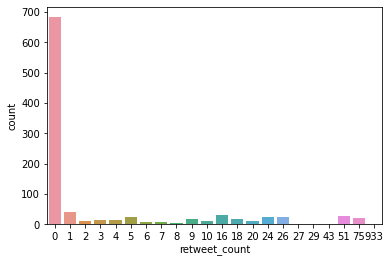

In [46]:
sns.countplot(x = 'retweet_count', data = tweet_df)

Favorite_Count

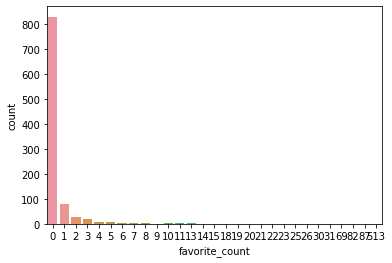

In [47]:
sns.countplot(x = 'favorite_count', data = tweet_df)

# <center><font color="blue">HashTag Analysis</font></center>



In [48]:
import re

HTfilters = set(['zz', 'architec', 'prize', 'stirli', 'architect', 'london', 'cpd', 'design', 'stirling', 'photogr', 'gemini', 
                 'mule', 'karaoke', 'playing', 'official', 'berita', 'follow', 'retweet', 'mufc', 'ntms', 'infolimit', 'eeaa', 
                 'eaa', 'cfc', 'caprico', 'breaking','news', 'libra', 'mereka', 'brankas', 'psikolog', 'aquarius', 'klc'])
# modifikasi HTfilters sesuai data kamu
HT = {'hashtags':[]}
count = 0
getHashTags = re.compile(r"#(\w+)")
for i, d in tqdm(enumerate(D)):
    hashtags = re.findall(getHashTags, d)
    if hashtags:
        TG = []
        for tag in hashtags:
            dTag = str(tag).strip().lower()
            if len(dTag)>2:
                add = True
                for f in HTfilters:
                    if f in dTag:
                        add=False; break
                if add:
                    TG.append('#'+dTag); count += 1
            HT['hashtags'].append(TG)
print('Found {} number of hashtags'.format(count))

1000it [00:00, 179712.24it/s]

Found 54 number of hashtags


100%|██████████| 54/54 [00:00<00:00, 25244.36it/s]


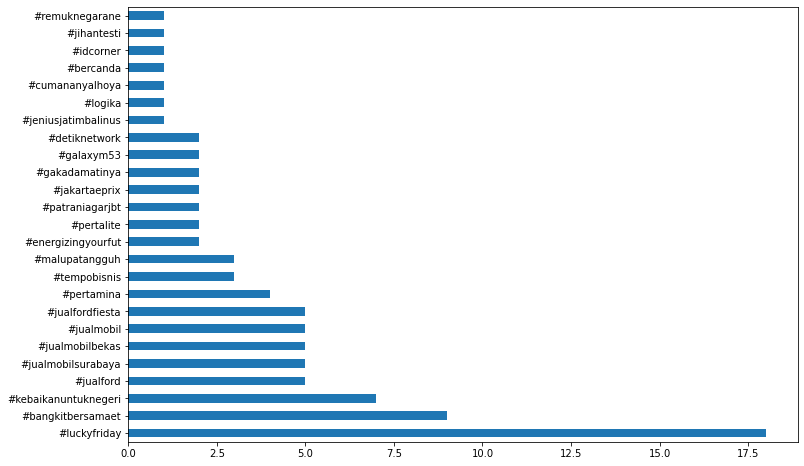

In [49]:
import pandas as pd

N = 50 # Number of top frequent hashtags to be plotted

dtHT = [x for t in tqdm(HT['hashtags']) for x in t] # any(h not in x for h in HTfilters)
dtHT = pd.Series(dtHT)
dtHT = dtHT.value_counts()
dtHT = dtHT.sort_index()
dtHT = dtHT.sort_values(ascending = False) 
dtHT.to_csv('hashTags_2021.csv', encoding='utf8')
dtHT = dtHT.iloc[:N]

p = dtHT.plot(kind='barh', figsize=(12,8), legend = False)

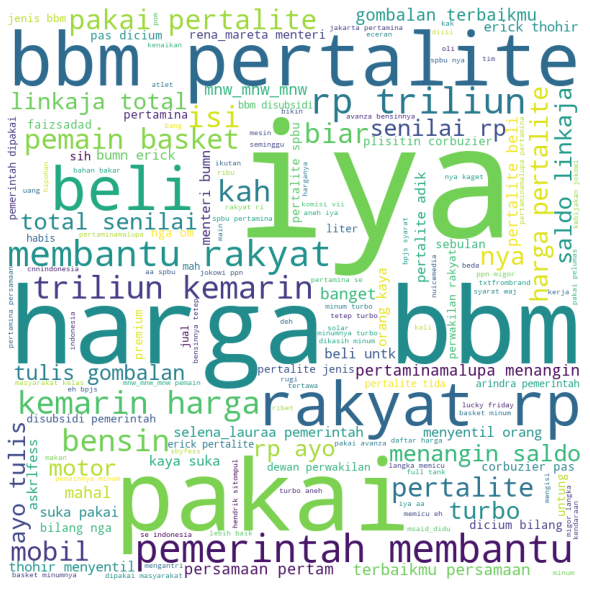

In [50]:
# Python program to generate WordCloud

# importing all necessary modules
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import pandas as pd

# Reads 'Youtube04-Eminem.csv' file
#df = pd.read_csv(r"/content/crawling.csv", encoding ="latin-1")
df=cleanD

comment_words = ''
stopwords = set(STOPWORDS)

# iterate through the csv file
#for val in df.full_text:
for val in df:
	# typecaste each val to string
	val = str(val)

	# split the value
	tokens = val.split()
	
	# Converts each token into lowercase
	for i in range(len(tokens)):
		tokens[i] = tokens[i].lower()
	
	comment_words += " ".join(tokens)+" "

wordcloud = WordCloud(width = 800, height = 800,
				background_color ='white',
				stopwords = stopwords,
				min_font_size = 10).generate(comment_words)

# plot the WordCloud image					
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

plt.show()


# Web Scrapping?

In [51]:
import urllib.request
from bs4 import BeautifulSoup as bs

URL = 'https://www.beritasatu.com/beritasatu-tv'
Doc = urllib.request.urlopen(URL).read()
Doc = bs(Doc,'lxml').text
print(Doc)






































































Indeks Berita Oleh BeritaSatu TV Terbaru dan Terkini  - BeritaSatu.com









BeritaSatu.com   |   BeritaSatuTV   |   Investor.id   |  
          Jakartaglobe.id   |   e-Paper   |  
          























CARI






REGISTER
LOGIN







HOME
NEWS
EKONOMI
BOLA
SPORT
OTOMOTIF
LIFESTYLE
OPINI
FOKUS

Y20 INDONESIA










HEADLINE




Nelayan Halmahera Selatan Ditemukan Tewas Terseret Ombak|Jokowi Minta Relawan Tidak Terburu-buru Usung Capres|Dua Wakil Indonesia Hadapi Tiongkok di Final Indonesia Masters

















"Indeks Berita Oleh BeritaSatu TV"



Share to Facebook




Share to Twitter




Share to WhatsApp




Share to Email





 




 








 
NEWSLETTER
Dapatkan informasi terbaru dari kami



SUBSCRIBE


                    Email yang Anda masukkan tidak valid.
                  






BERITA TERPOPULER

+ SELENGKAPNYA










1


Reshuffle Kabinet, PAN Tidak Berharap tetapi Siap Sumbang

# Loading Local Documents

1. Instalasi Java
 - JDK 8 ... ingat harus JDK 8
 - https://www.oracle.com/id/java/technologies/javase/javase-jdk8-downloads.html
 - Set Java Home Directory
2. Instalasi Tika Server :
 - Download Tika App Executable Java Jar: https://archive.apache.org/dist/tika/tika-app-1.24.1.jar
 - Put in Python home directory
3. Instalasi Module Python Tika
4. Reading pdf Files (Python Code below)

### Tika can read Pdf, DocX, PPTX, etc.

In [52]:
from tika import parser#, unpack

def readDocs(file):
    if 'pdf' in file:
        headers = {'X-Tika-PDFextractInlineImages': 'true',} 
        raw = parser.from_file(file, headers=headers)
    else:
        raw = parser.from_file(file)
    if 'content' in raw.keys():
        return raw['content']
    else:
        return None

In [53]:
try:
    doc = readDocs('data/contoh.pdf')
except:
    !mkdir data
    !wget -P data/ https://raw.githubusercontent.com/taudata-indonesia/eLearning/master/data/contoh.pdf
    doc = readDocs('data/contoh.pdf')
    
print(doc)

2022-06-12 04:24:30,658 [MainThread  ] [INFO ]  Retrieving http://search.maven.org/remotecontent?filepath=org/apache/tika/tika-server/1.24/tika-server-1.24.jar to /tmp/tika-server.jar.
2022-06-12 04:24:31,299 [MainThread  ] [INFO ]  Retrieving http://search.maven.org/remotecontent?filepath=org/apache/tika/tika-server/1.24/tika-server-1.24.jar.md5 to /tmp/tika-server.jar.md5.
2022-06-12 04:24:31,845 [MainThread  ] [WARNI]  Failed to see startup log message; retrying...


















































BUTIR-BUTIR PEDOMAN PENGHAYATAN DAN PENGAMALAN PANCASILA 
 
   
Lima asas dalam Pancasila dijabarkan menjadi 36 butir pengamalan, sebagai pedoman praktis bagi 
pelaksanaan Pancasila. 
 
Butir-butir Pancasila ditetapkan dalam Ketetapan MPR No. II/MPR/1978 tentang Ekaprasetia 
Pancakarsa. 
 
I. SILA PERTAMA : KETUHANAN YANG MAHA ESA 

1. Percaya dan Takwa kepada Tuhan Yang Maha Esa sesuai dengan agama dan kepercayaan 
masing-masing menurut dasar kemanusiaan yang adil dan beradab. 

2. Hormat menghormati dan bekerjasama antar pemeluk agama & penganut-penganut 
kepercayaan yang berbeda-beda sehingga terbina kerukunan hidup. 

3. Saling hormat-menghormati kebebasan menjalankan ibadah sesuai dengan agama dan 
kepercayaannya. 

4. Tidak memaksakan suatu agama dan kepercayaan kepada orang lain. 
 
II. SILA KEDUA : KEMANUSIAAN YANG ADIL DAN BERADAB 

1. Mengakui persamaan derajat, persamaan hak dan persamaan kewajiban antara sesama 
manusia. 

2 S

# <center><font color="blue"> Terimakasih</font></center>

<hr />
